#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_excel("C:\\Users\\Sapna\\Downloads\\Bike_Price_Prediction.xlsx")
df.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000


#### Performing EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.no                308 non-null    int64  
 1   Bike_company        308 non-null    object 
 2   Bike_model          308 non-null    object 
 3   Manufactured_year   308 non-null    int64  
 4   Engine_warranty     306 non-null    float64
 5   Engine_type         308 non-null    object 
 6   Fuel_type           308 non-null    object 
 7   CC(Cubic capacity)  308 non-null    object 
 8   Fuel_Capacity       307 non-null    object 
 9   Price               308 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 16.9+ KB


In [4]:
df.describe()

,S.no,Manufactured_year,Engine_warranty,Price
count,308.000000,308.000000,306.000000,3.080000e+02
mean,154.496753,2010.847403,6.032680,2.548416e+05
std,89.059088,104.747343,3.719542,2.950174e+05
min,1.000000,202.000000,2.000000,5.000000e+04
25%,77.750000,2017.000000,4.000000,7.500000e+04
50%,154.500000,2019.000000,5.000000,1.045000e+05
75%,231.250000,2020.000000,8.000000,3.412500e+05
max,308.000000,2050.000000,50.000000,1.779990e+06


In [5]:
df.isnull().sum()

S.no                  0
Bike_company          0
Bike_model            0
Manufactured_year     0
Engine_warranty       2
Engine_type           0
Fuel_type             0
CC(Cubic capacity)    0
Fuel_Capacity         1
Price                 0
dtype: int64

In [6]:
df['Engine_warranty'].fillna(df['Engine_warranty'].mean(),inplace = True)

In [7]:
df.isnull().sum()

S.no                  0
Bike_company          0
Bike_model            0
Manufactured_year     0
Engine_warranty       0
Engine_type           0
Fuel_type             0
CC(Cubic capacity)    0
Fuel_Capacity         1
Price                 0
dtype: int64

In [8]:
df.dropna(inplace  = True)

In [9]:
df.isnull().sum()

S.no                  0
Bike_company          0
Bike_model            0
Manufactured_year     0
Engine_warranty       0
Engine_type           0
Fuel_type             0
CC(Cubic capacity)    0
Fuel_Capacity         0
Price                 0
dtype: int64

In [10]:
df.shape

(307, 10)

In [11]:
df.replace({
    'CC(Cubic capacity)' : '[A-Za-z]',
    'Fuel_Capacity' : '[A-Za-z]'
    },'',regex = True,inplace = True)
df.head()

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220,10,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120,11,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140,12,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150,13,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350,14,65000


In [12]:
df.drop(['S.no','Bike_model','Manufactured_year'],inplace = True,axis = 1)

In [13]:
# converting categorical data to numerical data

obj_list = df.select_dtypes(include = "object").columns
obj_list

Index(['Bike_company', 'Engine_type', 'Fuel_type', 'CC(Cubic capacity)',
       'Fuel_Capacity'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in obj_list:
    df[feature] = le.fit_transform(df[feature].astype(str))

In [15]:
df.corr()

,Bike_company,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
Bike_company,1.000000,0.046005,-0.023516,0.131105,-0.074686,0.079400,0.064068
Engine_warranty,0.046005,1.000000,-0.012381,0.128999,0.217375,0.180869,0.336847
Engine_type,-0.023516,-0.012381,1.000000,-0.095856,-0.072465,0.030360,-0.128280
Fuel_type,0.131105,0.128999,-0.095856,1.000000,0.347272,0.667939,0.276841
CC(Cubic capacity),-0.074686,0.217375,-0.072465,0.347272,1.000000,0.500367,0.482673
Fuel_Capacity,0.079400,0.180869,0.030360,0.667939,0.500367,1.000000,0.485841
Price,0.064068,0.336847,-0.128280,0.276841,0.482673,0.485841,1.000000


#### To find co-relation between the features

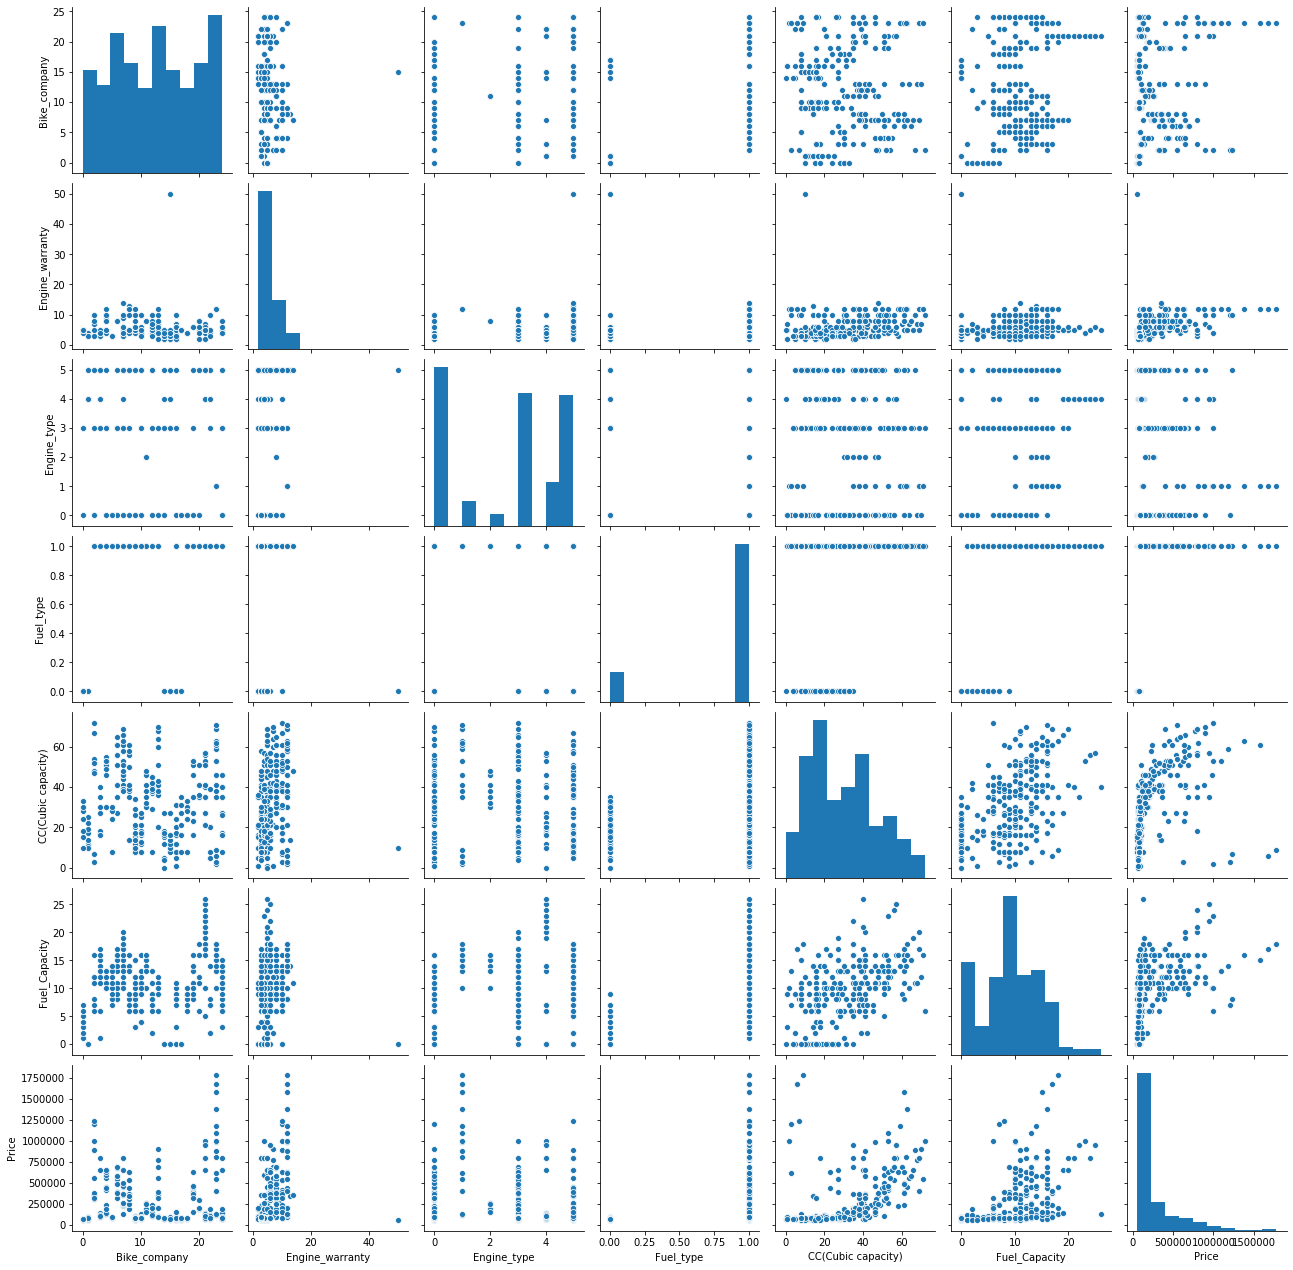

In [16]:
sns.pairplot(df)

#### Heat map

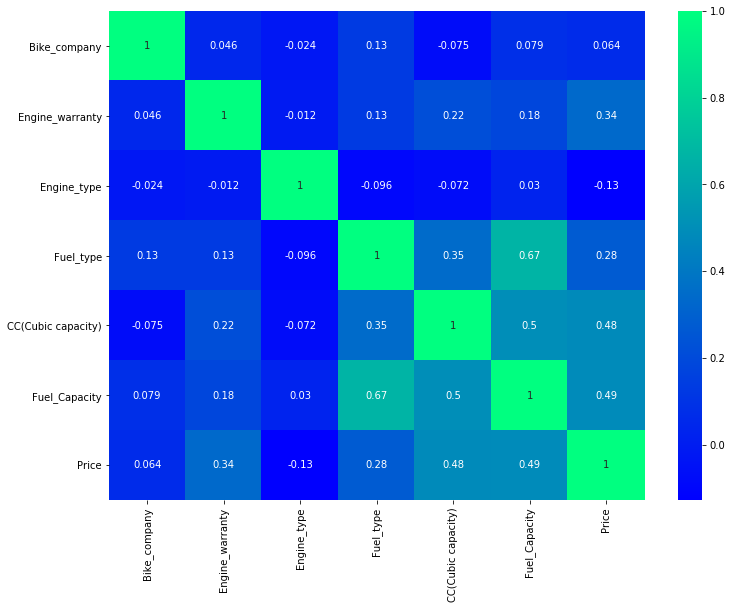

In [17]:
plt.figure(figsize = (12,9))
g = sns.heatmap(df.corr(),annot = True,cmap = 'winter')
g

#### seperating x and y varibale 

In [18]:
x = df.iloc[:,:-1]

In [19]:
y = df.iloc[::,-1]

#### Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

#### Building the model

In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Evaluating the model

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.7510197969028003